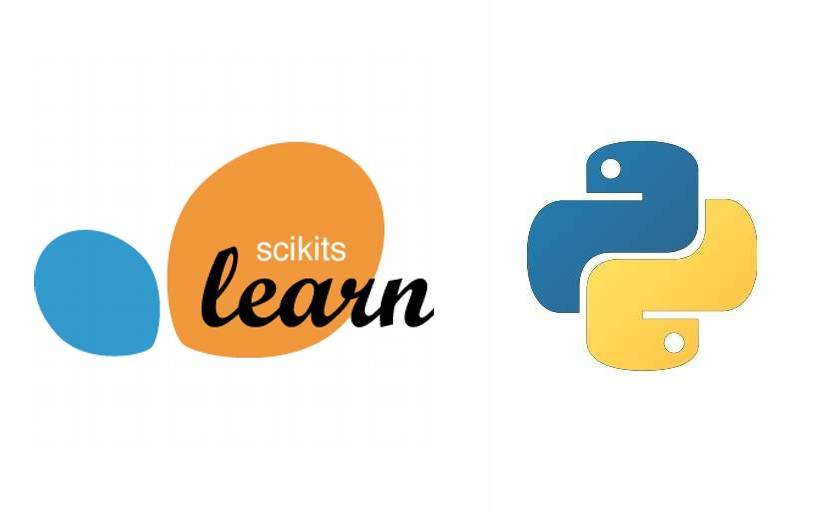

# BID01 - Pengenalan Data Science

Nama: Angelique Keyko Haryono

NRP: 2073016

### Week 7 - Multiple Linear Regression & Polynomial Regression

1. Sample Dataset
2. Preprocessing Dataset
3. Multiple Linear Regression
4. Polynomial Regression
5. Polynomial Regression: Quadratic
6. Polynomial Regression: Quadratic vs Cubic

#### Sample Dataset

Pada contoh ini, kita akan membentuk dataset dengan format pandas dataframe yang berisi daftar diameter, jumlah topping, dan harga pizza.

- Training Dataset

In [6]:
# mengimport modul pandas
import pandas as pd

# menyiapkan dictionary dimana setiap keynya akan berasosiasi dengan list
pizza = {'diameter': [6, 8, 10, 14, 18], # features
        'n_topping': [2, 1, 0, 2, 0],    # features
        'harga': [7, 9, 13, 17.5, 18]}   # target

# membentuk object dataframe dari dictionary yang sudah dibentuk
train_pizza_df = pd.DataFrame(pizza)

# menampung object dataframe yang dibentuk dalam variable train_pizza_df
train_pizza_df

,diameter,n_topping,harga
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


- Testing Dataset

In [7]:
# mengimport modul pandas
import pandas as pd

# menyiapkan dictionary dimana setiap keynya akan berasosiasi dengan list
pizza = {'diameter': [8, 9, 11, 16, 12], # features
        'n_topping': [2, 0, 2, 2, 0],    # features
        'harga': [11, 8.5, 15, 18, 11]}  # target

# membentuk object dataframe dari dictionary yang sudah dibentuk
test_pizza_df = pd.DataFrame(pizza)

# menampung object dataframe yang dibentuk dalam variable test_pizza_df
test_pizza_df

,diameter,n_topping,harga
0,8,2,11.0
1,9,0,8.5
2,11,2,15.0
3,16,2,18.0
4,12,0,11.0


#### Preprocessing Dataset

Kita akan melakukan pengelompokkan untuk sekumpulan nilai features dan nilai target dari dataset kita. Kita akan mengonversikan data diameter dan jumlah topping ke dalam numpy array, hasil konversi ini akan ditampung dalam variable X_train untuk training dataset. Data harga juga akan dikonversikan ke dalam numpy array, hasil konversi ini akan ditampung dalam variable y_train untuk training dataset. Kita juga akan melakukan hal yang sama untuk testing dataset.

In [8]:
# mengimport modul numpy
import numpy as np

# melakukan konversi menjadi numpy array
X_train = np.array(train_pizza_df[['diameter', 'n_topping']]) # sekumpulan nilai features
y_train = np.array(train_pizza_df['harga'])                   # sekumpulan nilai target

print(f'X_test:\n{X_train}\n')
print(f'y_test: {y_train}')

X_test:
[[ 6  2]
 [ 8  1]
 [10  0]
 [14  2]
 [18  0]]

y_test: [ 7.   9.  13.  17.5 18. ]


In [9]:
# melakukan konversi menjadi numpy array
X_test = np.array(test_pizza_df[['diameter', 'n_topping']]) # sekumpulan nilai features
y_test = np.array(test_pizza_df['harga'])                   # sekumpulan nilai target

print(f'X_test:\n{X_test}\n')
print(f'y_test: {y_test}')

X_test:
[[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [12  0]]

y_test: [11.   8.5 15.  18.  11. ]


#### Multiple Linear Regression

Multiple Linear Regression adalah generalisasi dari Simple Linear Regression yang memungkinkan untuk menggunakan beberapa explanatory variables.

Perbedaan antara Simple Linear Regression dengan Multiple Linear Regression terletak dalam jumlah explanatory variable / features yang digunakan. Pada Simple Linear Regression hanya digunakan 1 explanatory variable untuk melakukan prediksi. Sedangkan pada Multiple Linear Regression digunakan lebih dari satu explanatory variable untuk melakukan prediksi.

Berikut formula Multiple Linear Regression:

$y = \alpha + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

Berikut link referensi untuk mempelajari Linear Regression lebih lanjut:
https://en.wikipedia.org/wiki/Linear_regression

In [13]:
# melakukan import modul LinearRegression dan r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# membentuk object model
model = LinearRegression()

# melakukan proses training model
model.fit(X_train, y_train)

# melakukan proses prediksi
y_pred = model.predict(X_test)

print(f'r_squared: {r2_score(y_test, y_pred)}')

r_squared: 0.7701677731318468


#### Polynomial Regression

Polynomial Regression memodelkan hubungan antara independent variable (features) $x$ dan dependent variable (target) $y$ sebagai derajat polinomial dalam $x$. Berikut link referensi untuk mempelajari Polynomial Regression lebih lanjut:
https://en.wikipedia.org/wiki/Polynomial_regression

- Preprocessing Dataset

Disini kita hanya akan menggunakan 1 features yaitu diameter.

In [18]:
# membentuk features menjadi numpy array dan melakukan reshape menjadi array 2 dimensi.
X_train = np.array(train_pizza_df['diameter']).reshape(-1, 1)

# membentuk target menjadi numpy array
y_train = np.array(train_pizza_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

y_train: [ 7.   9.  13.  17.5 18. ]


#### Polynomial Regression: Quadratic

Untuk contoh kali ini, kita akan mempelajari derajat polynomial dua atau quadratic. Berikut formula Quadratic Polynomial Regression:

$y = \alpha + \beta_1x + \beta_2x^2$

- Polynomial Features

In [19]:
# mengimport modul PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# membentuk object PolynomialFeatures
quadratic_feature = PolynomialFeatures(degree=2)

# melakukan proses transformasi
X_train_quadratic = quadratic_feature.fit_transform(X_train)

print(f'X_train_quadratic:\n{X_train_quadratic}\n')

X_train_quadratic:
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]



- Training Model

In [21]:
# membentuk object model
model = LinearRegression()

# melakukan training model dengan memanfaatkan nilai features yang sudah diransformasikan ke dalam polynomial
model.fit(X_train_quadratic, y_train)

LinearRegression()

- Visualisasi Model

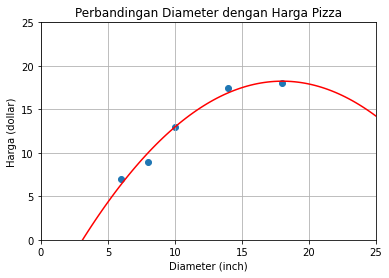

In [22]:
# mengimport modul
import matplotlib.pyplot as plt

# membentuk deret bilangan dan melakukan reshape
X_vis = np.linspace(0, 25, 100).reshape(-1, 1)

# melakukan proses transformasi
X_vis_quadratic = quadratic_feature.transform(X_vis)

# melakukan proses prediksi
y_vis_quadratic = model.predict(X_vis_quadratic)

# melakukan visualisasi untuk data point yang digunakan untuk proses training (scatter plot)
plt.scatter(X_train, y_train)

# melakukan visualisasi untuk hasil prediksi dari model (line plot)
plt.plot(X_vis, y_vis_quadratic, '-r')

# melakukan pengaturan title dan label
plt.title('Perbandingan Diameter dengan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')

# melakukan set limit 
plt.xlim(0, 25)
plt.ylim(0, 25)

# mengaktifkan grid
plt.grid(True)

# menunjukkan hasil scatter plot
plt.show()

#### Polynomial Regression: Quadratic vs Cubic

Kita akan membandingkan model Simple Linear Regression, Quadratic Polynomial Regression, dan Cubic Polynomial Regression.

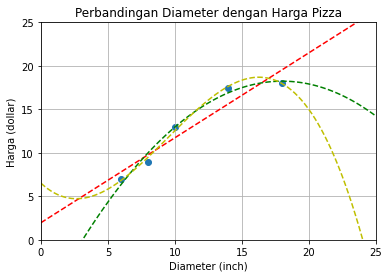

In [23]:
# melakukan plotting training set 
plt.scatter(X_train, y_train)

# linear
# membentuk object LinearRegression
model = LinearRegression()
# melakukan proses training
model.fit(X_train, y_train)
# membentuk deret bilangan dan melakukan reshape
X_vis = np.linspace(0, 25, 100).reshape(-1, 1)
# melakukan proses prediksi
y_vis = model.predict(X_vis)
# melakukan plotting
plt.plot(X_vis, y_vis, '--r', label='linear')

# Quadratic
# membentuk object PolynomialFeatures dan memberi nilai 2 pada parameter degree
quadratic_feature = PolynomialFeatures(degree=2)
# melakukan proses transformasi
X_train_quadratic = quadratic_feature.fit_transform(X_train)
# membentuk object LinearRegression
model = LinearRegression()
# melakukan proses training menggunakan model yang sudah ditransformasikan ke dalam quadratic polynomial
model.fit(X_train_quadratic, y_train)
# melakukan proses transformasi
X_vis_quadratic = quadratic_feature.transform(X_vis)
# melakukan proses prediksi
y_vis = model.predict(X_vis_quadratic)
# melakukan plotting
plt.plot(X_vis, y_vis, '--g', label='quadratic')

# Cubic
# membentuk object PolynomialFeatures dan memberi nilai 3 pada parameter degree
cubic_feature = PolynomialFeatures(degree=3)
# melakukan proses transformasi
X_train_cubic = cubic_feature.fit_transform(X_train)
# membentuk object LinearRegression
model = LinearRegression()
# melakukan proses training menggunakan model yang sudah ditransformasikan ke dalam cubic polynomial
model.fit(X_train_cubic, y_train)
# melakukan proses transformasi
X_vis_cubic = cubic_feature.transform(X_vis)
# melakukan proses prediksi
y_vis = model.predict(X_vis_cubic)
# melakukan plotting
plt.plot(X_vis, y_vis, '--y', label='cubic')

# melakukan pengaturan title dan label
plt.title('Perbandingan Diameter dengan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')

# melakukan set limit 
plt.xlim(0, 25)
plt.ylim(0, 25)

# mengaktifkan grid
plt.grid(True)

# menunjukkan hasil scatter plot
plt.show()